In [2]:
####lab_1.2####

In [170]:
import plotnine as pn
import polars as pl


In [102]:
## import data
batting = pl.read_csv("./data/BATTING_FINISHED_RESULTS_READ_ME_IYENGAR.csv")
pitching = pl.read_csv("./data/PITCHING_FINISHED_RESULTS_READ_ME_IYENGAR.csv")
batting.head()


yearID,lgID,hits,atbat,doubles,triples,homeruns,singles,slug_perc
i64,str,i64,i64,i64,i64,i64,i64,f64
1983,"""AL""",20662,77821,3710,549,1903,14500,0.40065
1994,"""AL""",15048,55198,2939,325,1774,10010,0.434056
1953,"""NL""",11342,42639,1777,414,1197,7954,0.411314
1993,"""AL""",20661,77506,3861,427,2074,14299,0.407685
1982,"""AL""",20566,77886,3493,519,2080,14474,0.402344


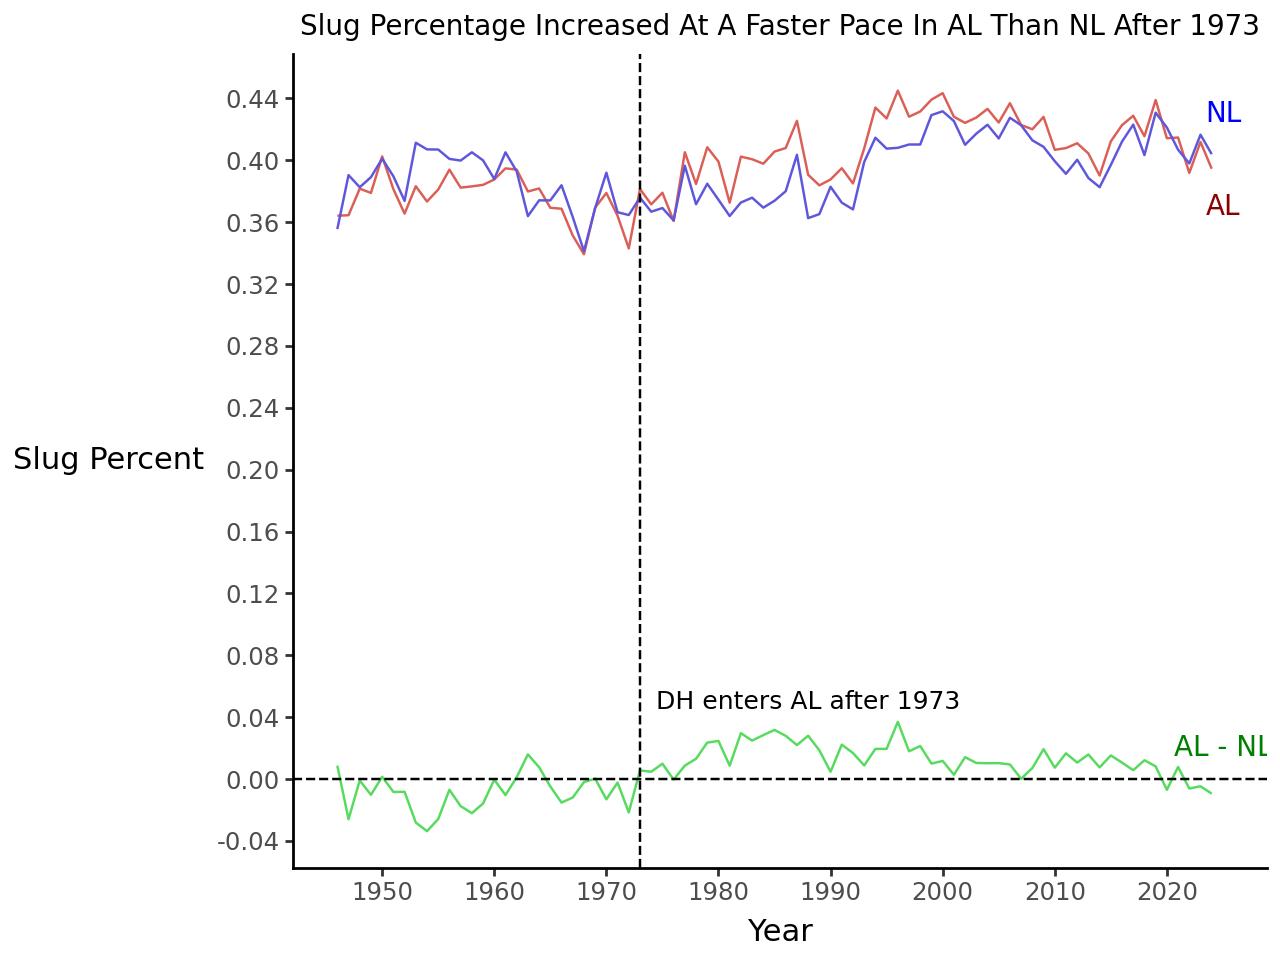

In [177]:
from plotnine import ggplot, aes, geom_line, geom_text,theme_minimal,scale_x_continuous,theme_classic,annotate,geom_hline,theme,element_line,element_rect,geom_qq_line,geom_vline,element_text,ggtitle

plottedbatting = (ggplot(batting.pivot(
    values="slug_perc",
    index="yearID",
    on="lgID",
    #aggregate_function="first"  # Use "first" since there should be only one value per group
).with_columns([
    (pl.col("AL") - pl.col("NL")).alias("AL-NL")]
).unpivot(
    on = ["AL","NL","AL-NL"]
    ,index = "yearID"
    ,variable_name = "lgID"
    ,value_name = "Slug Percent"
).rename(
    {"yearID": "Year"})
)
+geom_line(aes(x="Year"
              ,y="Slug Percent"
              ,color = "lgID")
          )
+theme_classic()
 + theme(axis_title_y=element_text(angle=0),
        legend_position='none',
        plot_title=element_text(size=10)  # Increase top margin
)
 + ggtitle("Slug Percentage Increased At A Faster Pace In AL Than NL After 1973")
+ annotate("text", x=1988, y=.05, label="DH enters AL after 1973", color="black", size=9)
+ geom_hline(yintercept=0, linetype="dashed", color="black", size=.5)
+ geom_vline(xintercept=1973, linetype="dashed", color="black", size=.5)
+ annotate("text", x=2025,y=.37,label = "AL", color = "darkred", size = 10  )
+ annotate("text", x=2025, y = .43, label = "NL", color  =  "blue", size = 10)
+ annotate("text", x=2025, y = .02, label = "AL - NL", color  =  "green", size = 10)
+ scale_y_continuous(breaks=[-.04,0, .04, .08, .12, .16, 0.20,.24,.28,.32,.36,.40,.44,.48])
+scale_x_continuous(breaks = [1950,1960,1970,1980,1990,2000,2010,2020])
) 
plottedbatting

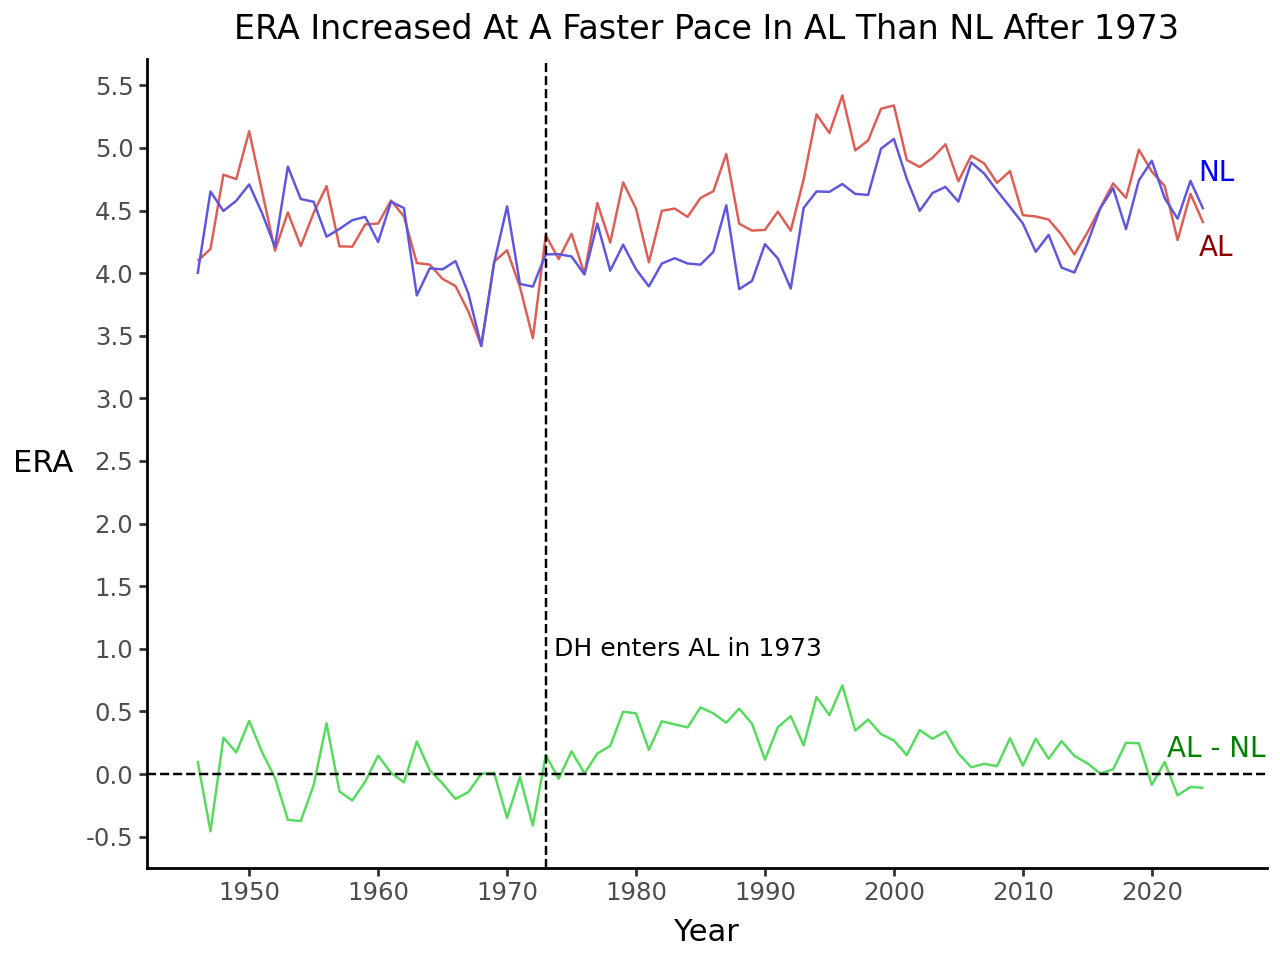

In [175]:
from plotnine import ggplot, aes,scale_y_continuous, geom_line, geom_text,theme_minimal,theme_classic,annotate,geom_hline,theme,element_line,element_rect,geom_qq_line,geom_vline,element_text

plotted = (ggplot(pitching.pivot(
    values="era",
    index="yearID",
    on="lgID",
    aggregate_function="first"  # Use "first" since there should be only one value per group
).with_columns([
    (pl.col("AL") - pl.col("NL")).alias("AL-NL")]
).unpivot(
    on = ["AL","NL","AL-NL"]
    ,index = "yearID"
    ,variable_name = "lgID"
    ,value_name = "ERA"
).rename(
    {"yearID": "Year"})
)
+geom_line(aes(x="Year"
              ,y="ERA"
              ,color = "lgID")
          )
+theme_classic()
 + theme(axis_title_y=element_text(angle=0),
        legend_position='none',
        plot_title=element_text(size=12))
 + ggtitle("ERA Increased At A Faster Pace In AL Than NL After 1973")
+ annotate("text", x=1984, y=1, label="DH enters AL in 1973", color="black", size=9)
+ geom_hline(yintercept=0, linetype="dashed", color="black", size=.5)
+ geom_vline(xintercept=1973, linetype="dashed", color="black", size=.5)
+ annotate("text", x=2025,y=4.2,label = "AL", color = "darkred", size = 10  )
+ annotate("text", x=2025, y = 4.8, label = "NL", color  =  "blue", size = 10)
+ annotate("text", x=2025, y = .2, label = "AL - NL", color  =  "green", size = 10)
+ scale_y_continuous(breaks=[-.5,0, .5, 1, 1.5, 2.0, 2.5,3,3.5,4,4.5,5,5.5,6])
+scale_x_continuous(breaks = [1950,1960,1970,1980,1990,2000,2010,2020])
) 
plotted

In [178]:
plotted.save("./img/era.png")
plottedbatting.save("./img/slug_perc.png")

/home/tmichel3796/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/tmichel3796/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ./img/era.png
/home/tmichel3796/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/tmichel3796/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ./img/slug_perc.png


In [ ]:
## the below has noo affect on the assignment, and is just here to take heads from the pitcher and batter datasets  after doing the 
## manipulations that are in  the chart.

In [182]:
## note that i'm not storing this, this code was originally placed inline within my ggplot itself.
## this is just to  show you the head of my  data.

pitching.pivot(
    values="era",
    index="yearID",
    on="lgID",
    aggregate_function="first"  # Use "first" since there should be only one value per group
).with_columns([
    (pl.col("AL") - pl.col("NL")).alias("AL-NL")]
).unpivot(
    on = ["AL","NL","AL-NL"]
    ,index = "yearID"
    ,variable_name = "lgID"
    ,value_name = "ERA"
).rename(
    {"yearID": "Year"}).head(10)

Year,lgID,ERA
i64,str,f64
1946,"""AL""",4.098084
1947,"""AL""",4.193662
1948,"""AL""",4.786844
1949,"""AL""",4.751302
1950,"""AL""",5.133358
1951,"""AL""",4.653741
1952,"""AL""",4.179424
1953,"""AL""",4.485217
1954,"""AL""",4.216749


In [181]:
## note that i'm not storing this, this code was originally placed inline within my ggplot itself.
## this is just to  show you the head of my  data.
batting.pivot(
    values="slug_perc",
    index="yearID",
    on="lgID",
    #aggregate_function="first"  # Use "first" since there should be only one value per group
).with_columns([
    (pl.col("AL") - pl.col("NL")).alias("AL-NL")]
).unpivot(
    on = ["AL","NL","AL-NL"]
    ,index = "yearID"
    ,variable_name = "lgID"
    ,value_name = "Slug Percent"
).rename(
    {"yearID": "Year"}).head(10)

Year,lgID,Slug Percent
i64,str,f64
1983,"""AL""",0.40065
1994,"""AL""",0.434056
1953,"""AL""",0.38321
1993,"""AL""",0.407685
1982,"""AL""",0.402344
2006,"""AL""",0.43687
1975,"""AL""",0.379006
1988,"""AL""",0.390598
1978,"""AL""",0.38467
